# Decision Tree



این الگوریتم برای تشخیص بیماری دیابت طراحی شده. داده شامل اطلاعاتی و ویژگی هایی راجب گلوگز و فشارخون و ... بیمار هست که ما در پیش بینی بهتر  کمک میکنه.

this algorithm is designed for diagnosing diabetes. The dataset includes information and features about glucose, blood pressure, and so on, which help us make better predictions



 توجه توضیح یسری از سلول ها اگر وجود ندارد در فایل

music.upynb
است


 Note: Some of the explanations or cells may be missing here, but they are available in the file `music.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import entropy



دیتا از:https://www.kaggle.com/code/paultimothymooney/predict-diabetes-from-medical-records/input
~~~Data

In [2]:
file=pd.read_csv('diabetes.csv')
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
file.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
x=file[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]


In [5]:
y=file['Outcome'].values
y[:5]

array([1, 0, 1, 0, 1])

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

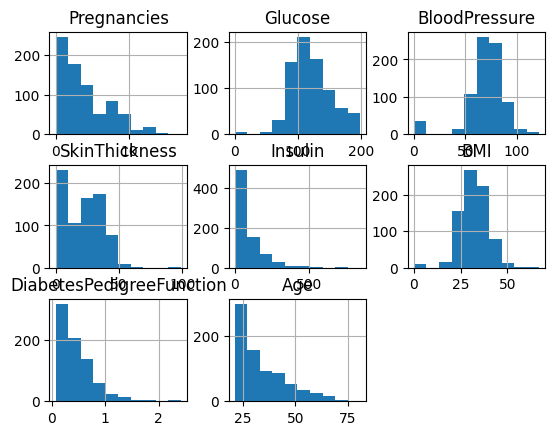

In [6]:
x.hist()

In [7]:
x=np.asanyarray(x)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

print('x_train shape:',x_train.shape,y_train.shape)
print('x_test shape:',x_test.shape,y_test.shape)

x_train shape: (614, 8) (614,)
x_test shape: (154, 8) (154,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train1=sc.fit_transform(x_train)
test1=sc.transform(x_test)



اینتروپی : روشی برای کم کردن میزان بی نظمی داده


**Entropy:** A method used to reduce the level of disorder or randomness in data


In [10]:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=4)
model.fit(train1,y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [11]:
y_hat=model.predict(test1)



نمره دقت خوبه ولی عالی نیست.

The accuracy score is good, but not excellent.


In [12]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
accuracy_score(y_test,y_hat)

0.7012987012987013



تعادل بین
recall score , precision_score
خیلی عالی نیست ولی خیلی بد هم نیست

The balance between recall score and precision score is not excellent, but it's not too bad either


In [13]:
f1_score(y_test,y_hat)

0.6515151515151515


مدل نمونه های مثبتی رو که حدس زده همه رو درست حدس نزده ولی خیلی بد هم نیست


The model did not correctly predict all of the positive samples it identified.But it's not too bad either

In [14]:
precision_score(y_test,y_hat)

0.6142857142857143

کلاس نمونه های مثبت واقعی رو خیلی عالی نتوسنته حدس بزنه.
ولی خیلی بد هم نیست.

The model did not predict the true positive class very well.
But it's not too bad either.

In [15]:
recall_score(y_test,y_hat)

0.6935483870967742




بطور کلی , مدل عالی عمل نکرده و عملکردش متوسط رو به ضعیف هست

Overall, the model did not perform excellently and its performance was mediocre to poor.